# <a id="inicio"></a> Exercícios Análise Exploratória de Dados

-----

### **Autor:** Glauco Lauria Marques Filho

-----

# <a id="resumo"></a> Resumo 

#### Este arquivo contém a resolução dos exercícios da Aula 3 do curso CEDS-808: Aprendizado de Máquina. 

# <a id="sumario"></a> Sumário


* [Início](#inicio)
* [Resumo](#resumo)
* [Sumário](#sumario)
* [Importação de Requisitos](#requisitos)
1. [Dataset Breast Cancer Winconsin](#dataset)
- 1.a. [Histogramas](#histogram)
- 1.b. [Violin Plot](#violin)
- 1.c. [Curvas de Andrew](#andrew)
- 1.d. [Análise](#analise)

2. [Capítulos 2 e 3 do livro Python Data Vizualization](#livro)


# <a id="requisitos"></a> Importação de Requisitos

In [1]:
from ucimlrepo import fetch_ucirepo # Biblioteca que possui os dados da base Breast Cancer Winconsin
import seaborn as sns # Biblioteca de plotagem
import matplotlib.pyplot as plt # Biblioteca de graficos 
import numpy as np # Biblioteca matematica numpy
from pandas.plotting import andrews_curves # Funcao das curvas de Andrew


# <a id="dataset"></a> 1. Dataset Breast Cancer Winconsin

Utilizando o dataset Breast Cancer Winconsin para o exercício. Importando o dataset da biblioteca, e carregando dataframes de Features e Target.

In [2]:
# Importando o dataset Breast Cancer Winconsin
breast_c = fetch_ucirepo(id=17) 
# Definindo dataframe de Features e target
X = breast_c.data.features 
y = breast_c.data.targets

Pritando um pouco dos dataframes para uma primeira exploração da base de dados.

In [3]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.tail()

,Diagnosis
564,M
565,M
566,M
567,M
568,B


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

# <a id="histogram"></a> 1.a. Histogramas

Montando histogramas para permitir ver a distribuição dos dados para cada classe.

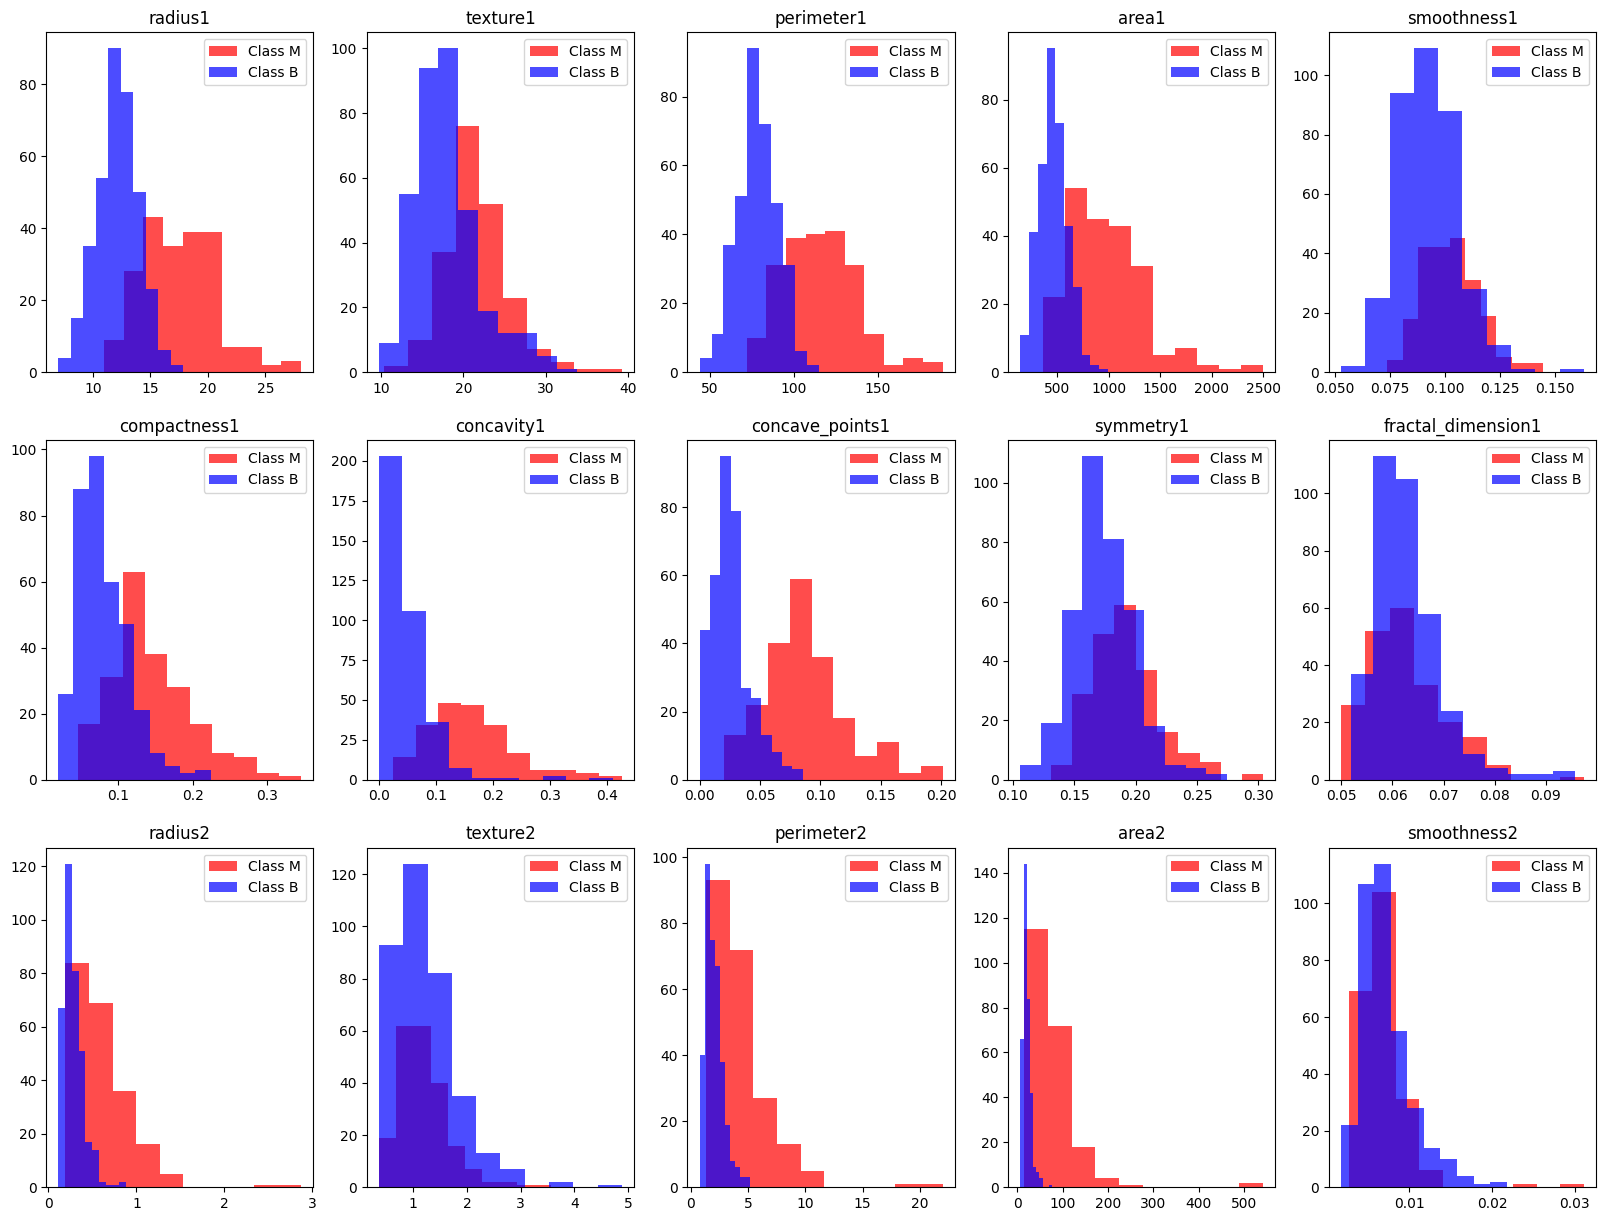

In [6]:
X_part_1 = X.iloc[:, :15].copy()
X_part_1["Diagnosis"] = y["Diagnosis"]
plt.figure(figsize=(20, 15))
for i, column in enumerate(X_part_1.columns[:-1], 1):
    plt.subplot(3, 5, i)
    plt.hist(X_part_1[X_part_1['Diagnosis'] == "M"][column], alpha=0.7, label='Class M', color='red')
    plt.hist(X_part_1[X_part_1['Diagnosis'] == "B"][column], alpha=0.7, label='Class B', color='blue')
    plt.title(column)
    plt.legend()


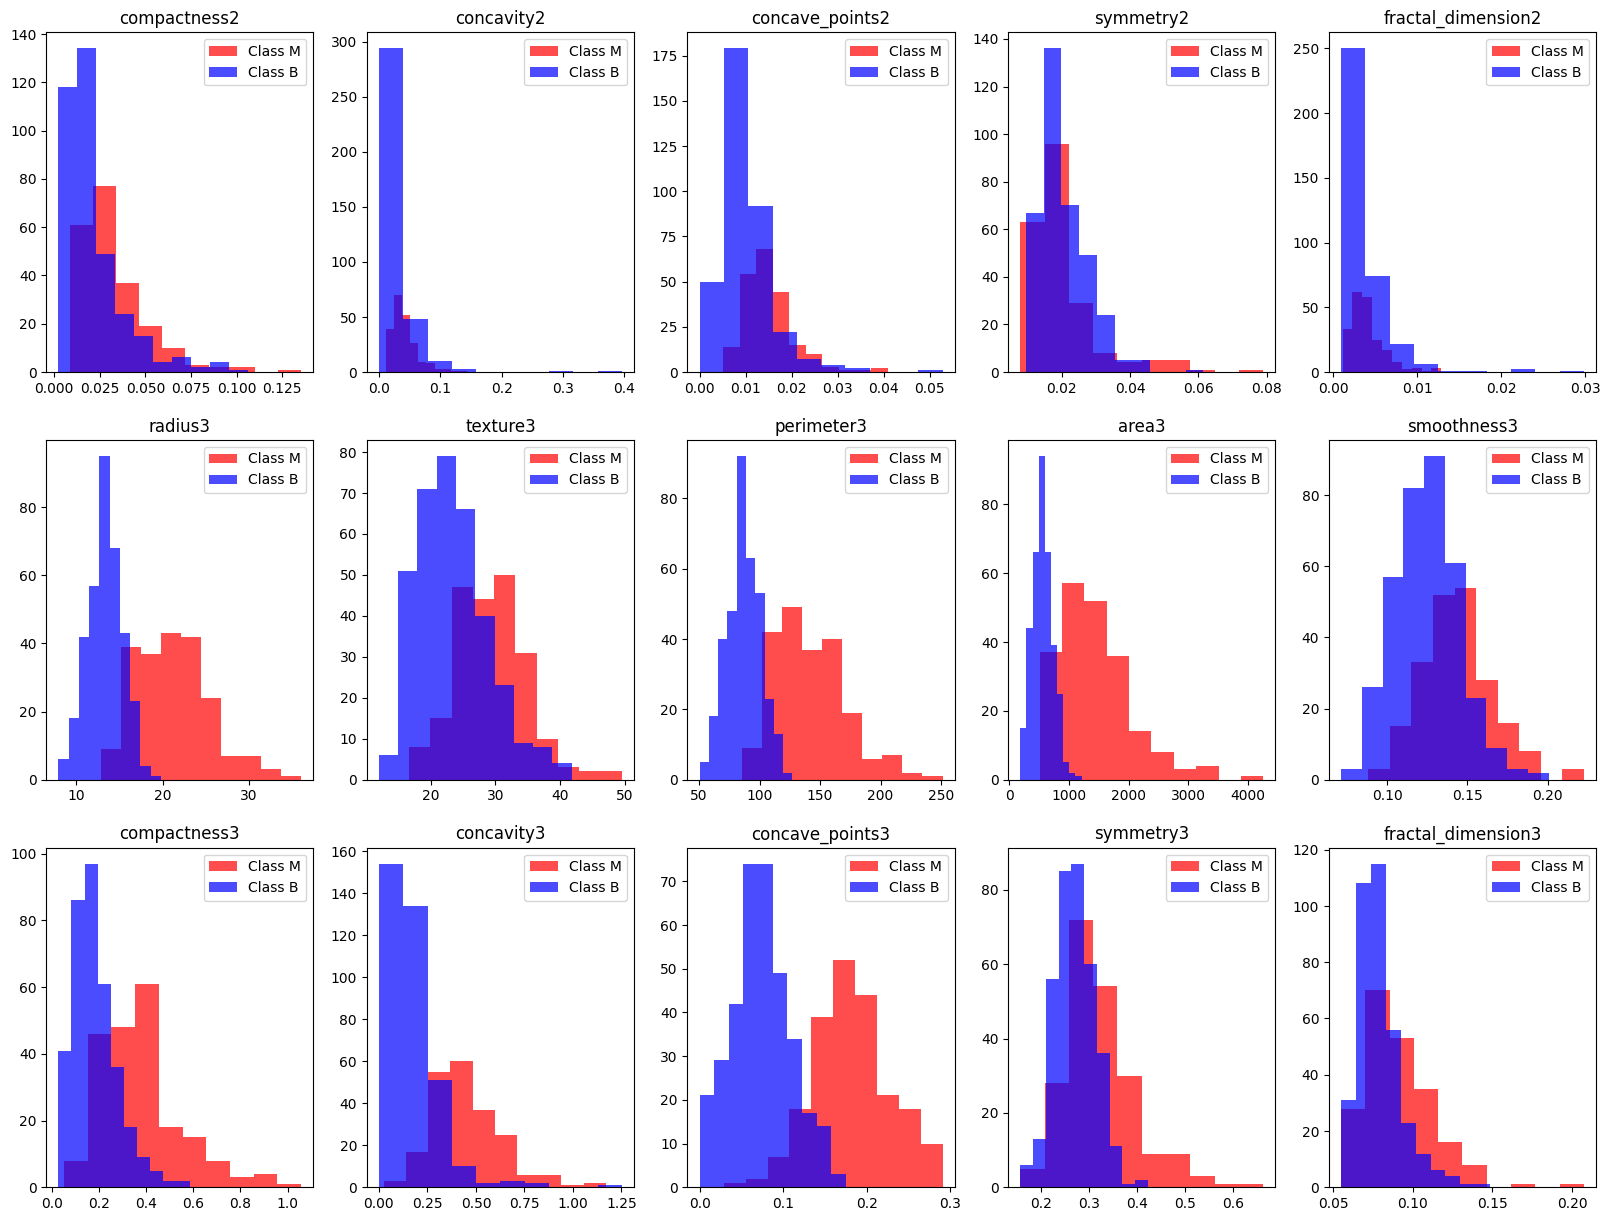

In [7]:
X_part_2 = X.iloc[:, 15:].copy()
X_part_2["Diagnosis"] = y["Diagnosis"]
plt.figure(figsize=(20, 15))
for i, column in enumerate(X_part_2.columns[:-1], 1):
    plt.subplot(3, 5, i)
    plt.hist(X_part_2[X_part_2['Diagnosis'] == "M"][column], alpha=0.7, label='Class M', color='red')
    plt.hist(X_part_2[X_part_2['Diagnosis'] == "B"][column], alpha=0.7, label='Class B', color='blue')
    plt.title(column)
    plt.legend()


*__Análises serão feitas no último item.__*

# <a id="violin"></a> 1.b. Violin Plot

Montando violin plots para permitir ver a distribuição dos dados para cada classe.

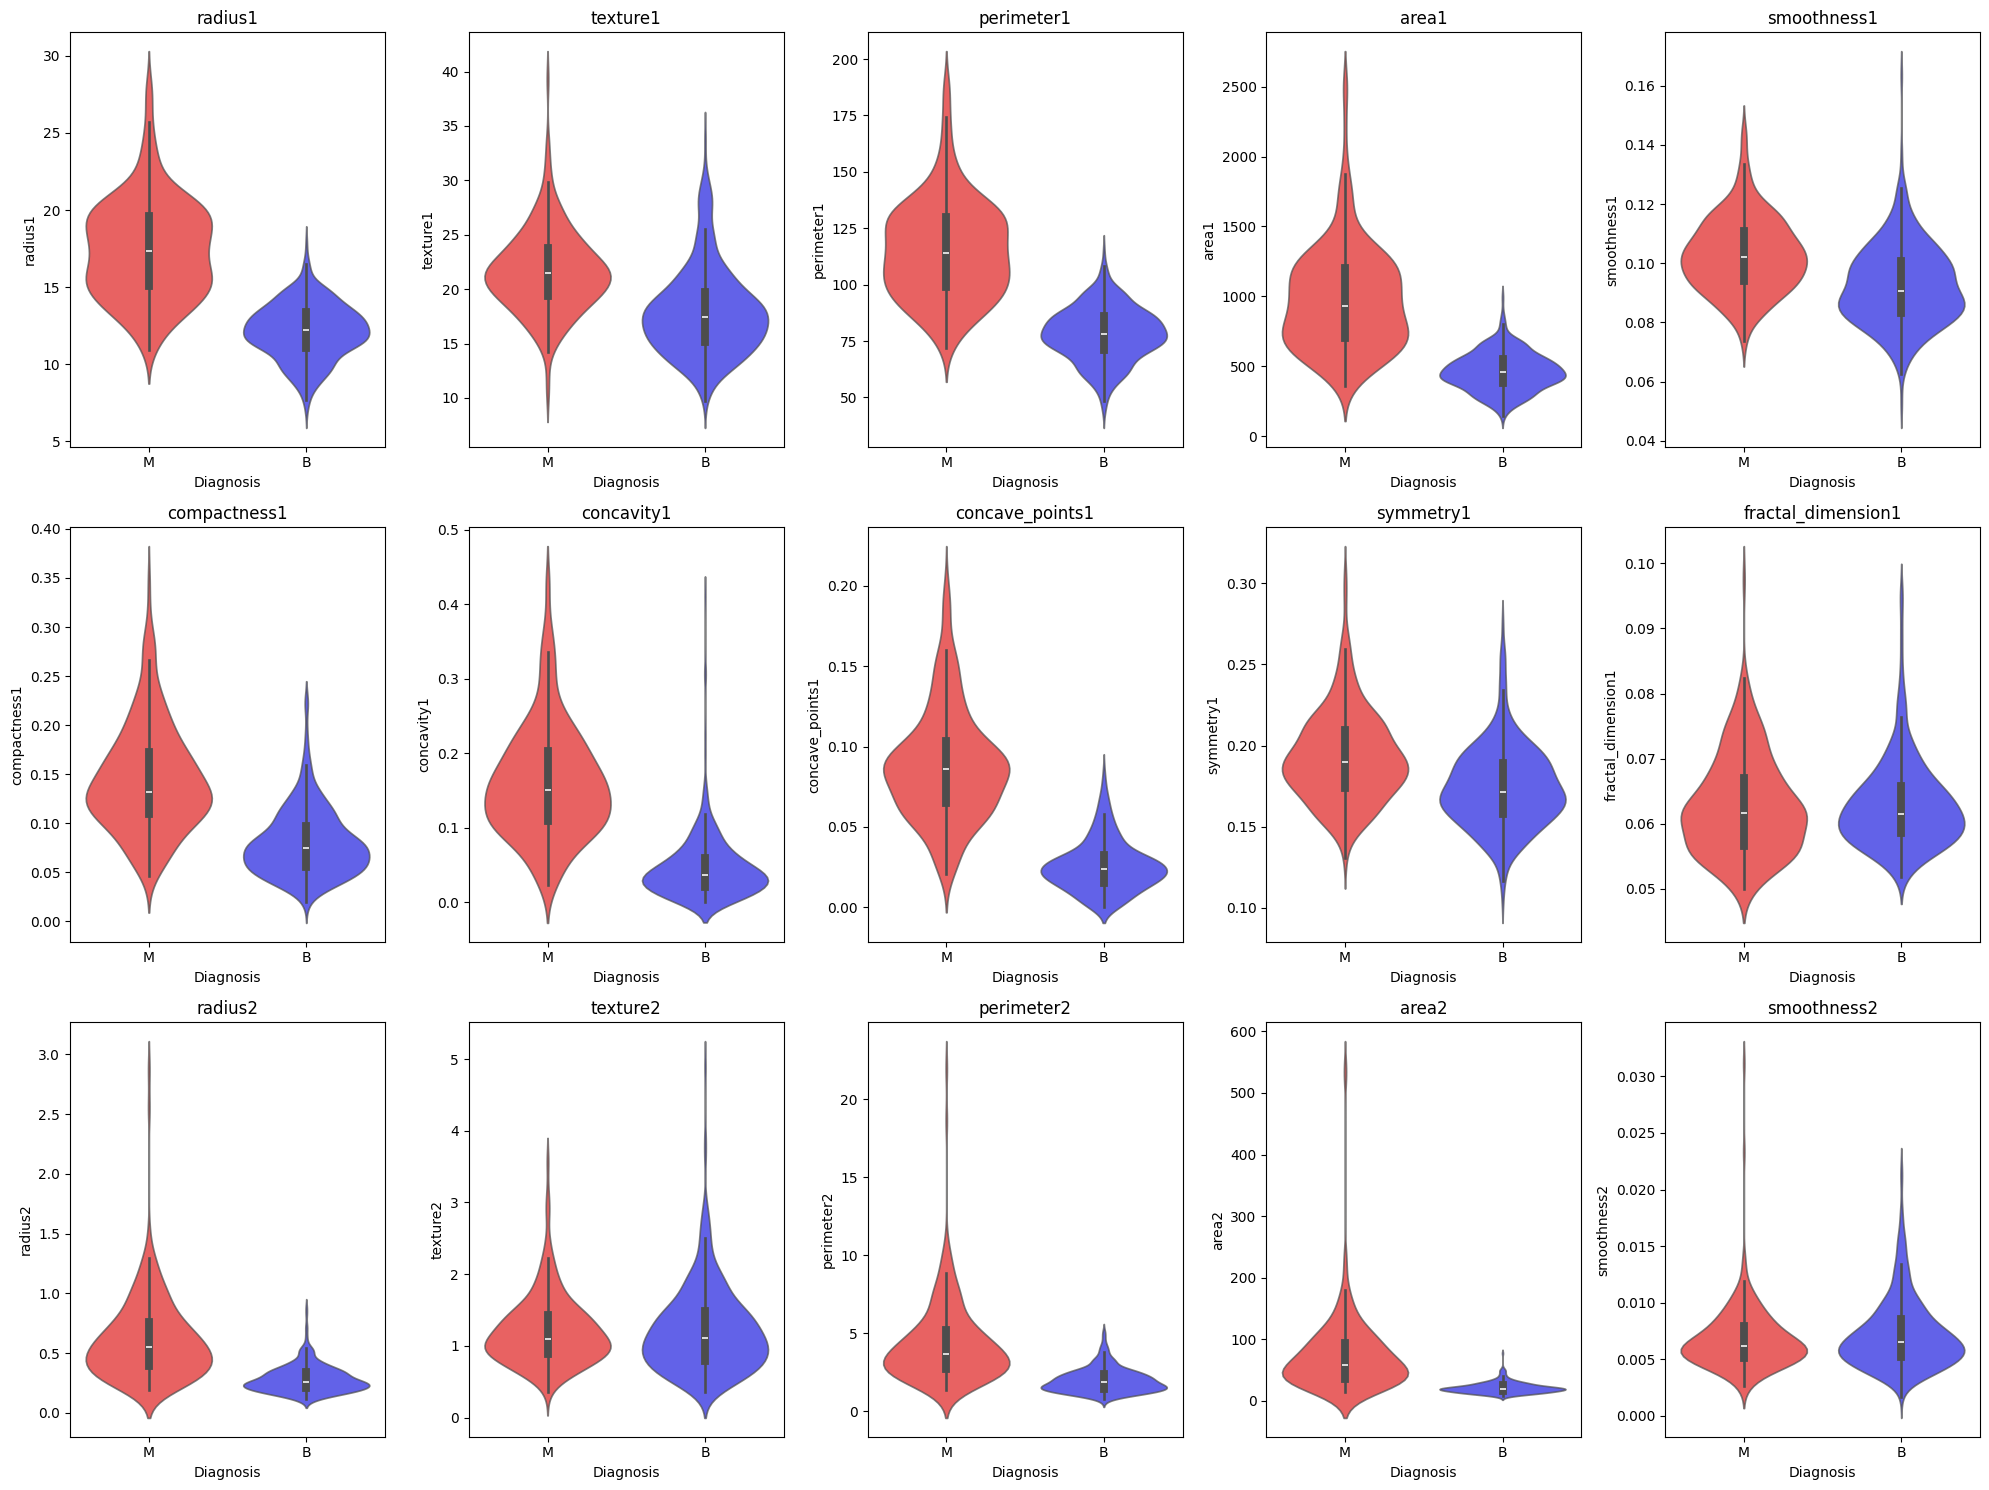

In [8]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(X_part_1.columns[:-1], 1):
    plt.subplot(3, 5, i)
    sns.violinplot(x='Diagnosis', y=column, hue='Diagnosis', data=X_part_1, palette=['red', 'blue'], legend=False, alpha=0.7)
    plt.title(column)
plt.tight_layout()
plt.show()

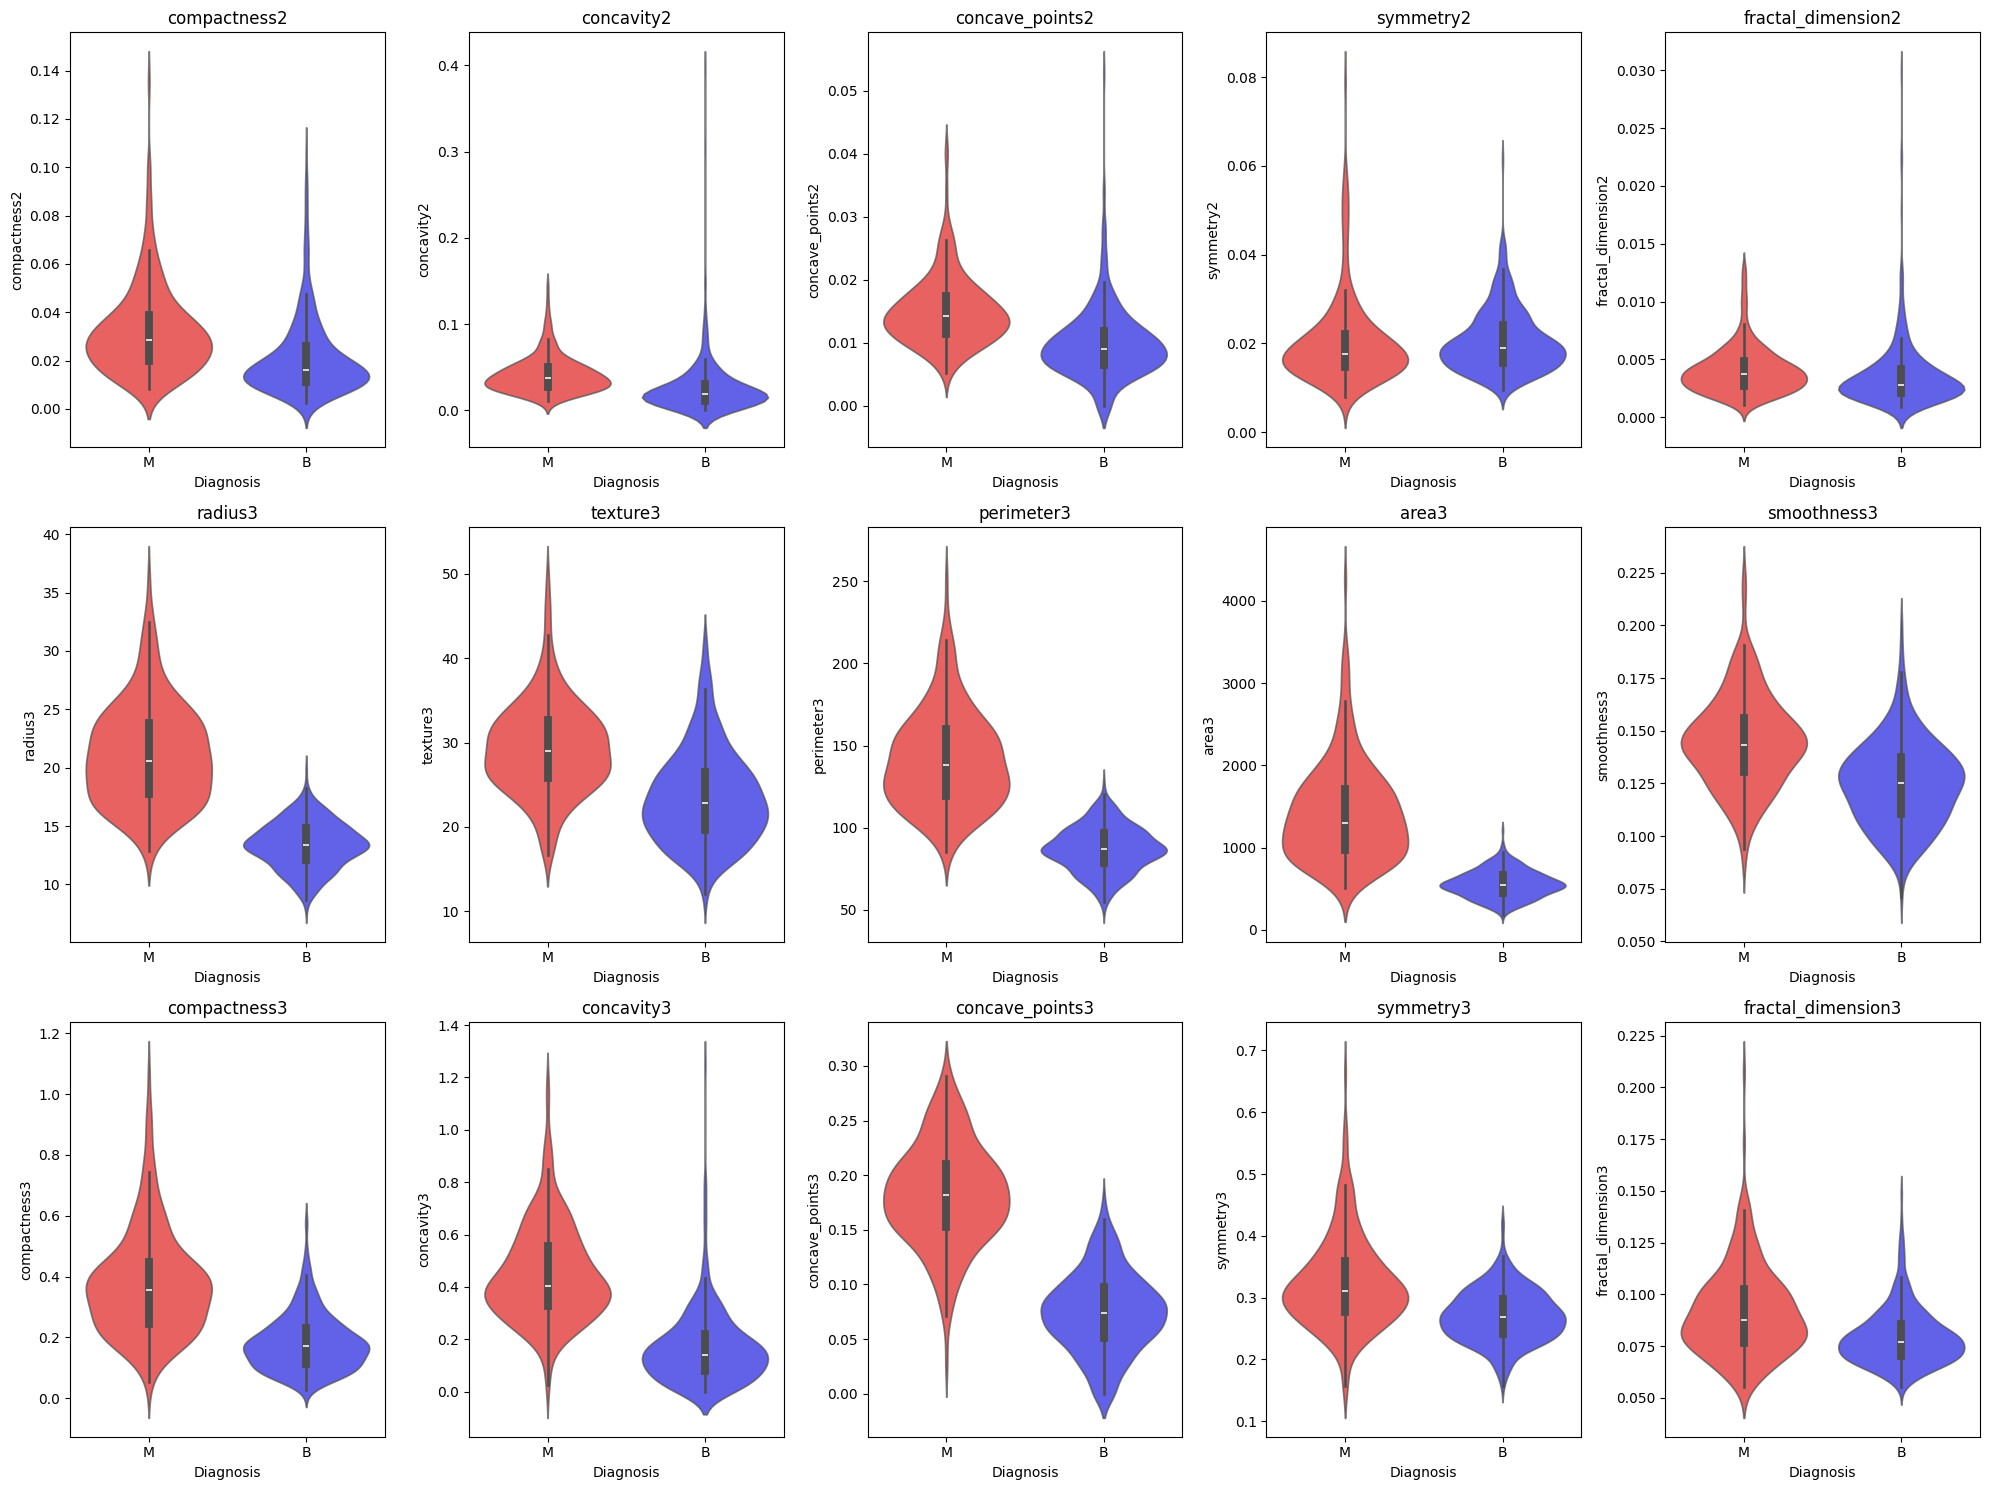

In [9]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(X_part_2.columns[:-1], 1):
    plt.subplot(3, 5, i)
    sns.violinplot(x='Diagnosis', y=column, hue='Diagnosis', data=X_part_2, palette=['red', 'blue'], legend=False, alpha=0.7)
    plt.title(column)
plt.tight_layout()
plt.show()

*__Análises serão feitas no último item.__*

# <a id="andrew"></a> 1.c. Curvas de Andrew

Montando Curvas de Andrew. Se as curvas para duas observações são semelhantes, isso sugere que essas observações têm padrões de variáveis semelhantes.

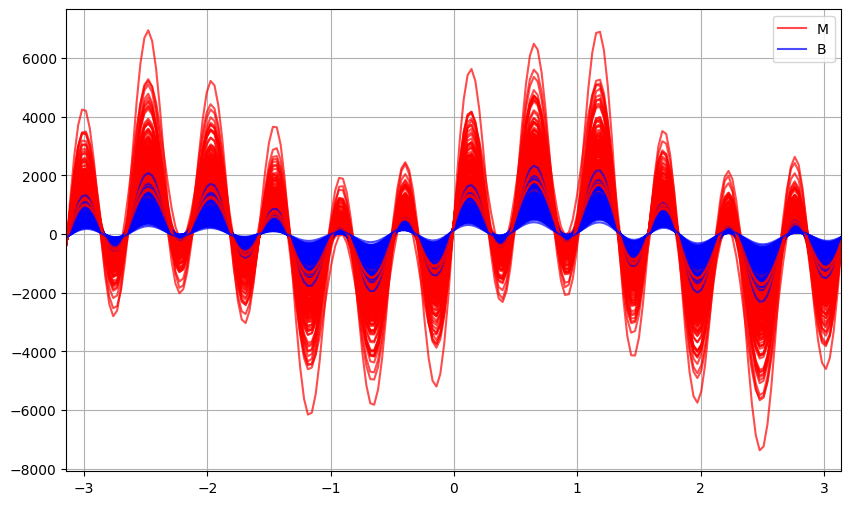

In [10]:
df = X.copy()
df['Diagnosis'] = y['Diagnosis']
plt.figure(figsize=(10, 6))
andrews_curves(df, 'Diagnosis', color=["red","blue"],alpha=0.7)
plt.show()

*__Análises serão feitas no último item.__*

# <a id="analise"></a> 1.d. Análise

Na análise realizada, utilizando histogramas e gráficos de violino para cada característica, podemos perceber diferenças visuais na distribuição das variáveis entre tumores benignos e malignos. As características mais evidentes visualmente que possuem grandes diferenças entre as classes foram:
* Raio
* Perímetro
* Área
* Concavidade
* Pontos Côncavos

Esses valores fazem sentido se pegarmos alguns conceitos de medicina, como o de que tumores malignos tendem a ser maiores e mais irregulares. A distribuição dos gráficos confirmou esses conceitos. Para uma análise mais aprofundada, seria importante envolver alguém com conhecimento do domínio, como um médico.

# <a id="livro"></a> 2. Capítulos 2 e 3 do livro Python Data Vizualization

O capítulo 2 do livro fala um pouco sobre o poder de utilizar elementos gráficos ao passar informações para outros seres humanos. Ele cita como argumentos o "Poder de Conectar". Humanos se conectam e interpretam melhor com estímulos visuais do que números e textos. Ele também cita o "Poder de Obter Insights". Informações passadas através de boas ferramentas visuais ajudam a audiência entender mensagens e histórias passadas, e até mesmo ajudam as pessoas a entender mensagens que ficaram de forma implícita. O terceiro argumento é o "Poder de Influenciar". Ele cita como o marketing deixou de ser sobre falar de um produto, mas sim sobre histórias que você quer passar e como influenciar, e nada melhor do que isso do que um storytelling visual, que conecta os humanos de forma emocional e psicológica. Por fim, o último argumento é o "Poder de Informar e Tomar Decisões Rápidas". Ele cita que humanos foram treinados a responder melhor e mais rapidamente a estímulos visuais. Ele cita que informações visuais são processadas 60 mil vezes mais rapidamente do que textos pelo cérebro humano.

O terceiro capítulo do livro aborda os diversos elementos gráficos e ferramentas disponíveis. Ele cita tipos de gráficos, como distribuições, gráficos temporais e comparações. Além disso, o autor monta diversas tabelas informativas sobre gráficos e seus usos, fornecendo uma boa fonte de informações quando estamos em dúvida sobre qual gráfico utilizar para alcançar um determinado objetivo. Por exemplo, se o propósito é mostrar a distribuição dos dados e temos múltiplas variáveis, ele indica o uso de scatter plots. O autor também apresenta uma tabela com diversas ferramentas que podem ser utilizadas para visualização dos dados.